<a href="https://colab.research.google.com/github/kangheedae1/heedae2/blob/main/card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q imbalanced-learn
!apt -q install fonts-nanum > /dev/null
!apt-get update -qq
!apt-get install -y fonts-nanum




W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 95 not upgraded.


🚀  신용카드 데이터 전처리 파이프라인 시작
✅ 한글 폰트 설정 완료
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 구글 드라이브 마운트 완료

📂 데이터 로드 중: /content/drive/MyDrive/project/card_train.csv
✅ 데이터 로드 완료: (70560, 738)
📊 컬럼 수: 738, 행 수: 70,560

📋 데이터 기본 정보
🔍 데이터 형태: (70560, 738)
🔍 메모리 사용량: 603.27 MB

🎯 타겟 변수 (Segment) 분포:
   A: 28개 (0.0%)
   B: 4개 (0.0%)
   C: 3,753개 (5.3%)
   D: 10,270개 (14.6%)
   E: 56,505개 (80.1%)

❓ 결측치가 있는 컬럼: 31개
상위 5개 컬럼:
   RV신청일자: 57,196개 (81.1%)
   RV전환가능여부: 855개 (1.2%)
   혜택수혜율_R3M: 14,480개 (20.5%)
   혜택수혜율_B0M: 16,375개 (23.2%)
   가입통신회사코드: 11,445개 (16.2%)


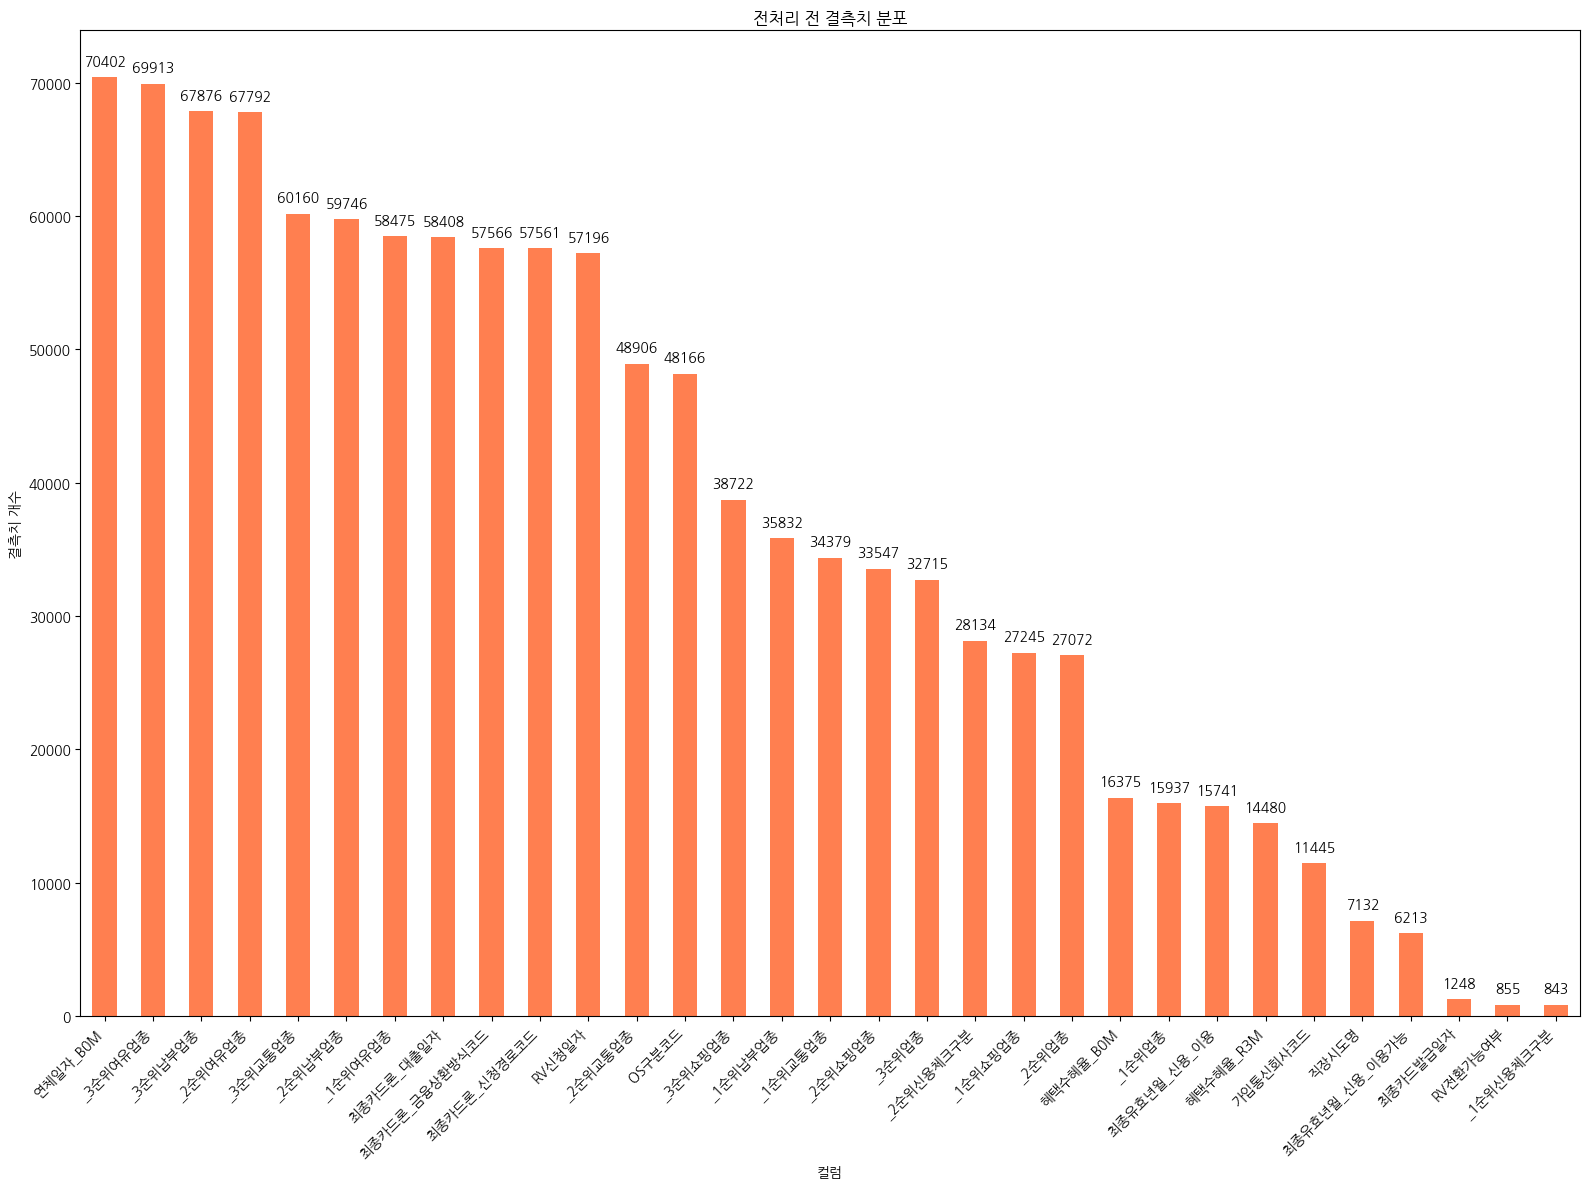


🔧 전처리 파이프라인 실행
[19:00:45] 🚀 전처리 시작
[19:00:45] 📊 원본 데이터 크기: (70560, 738)
[19:00:45] ✅ 컬럼 선택 완료: 39개 컬럼 사용
[19:00:45] ✅ 이진 문자값 변환 완료
[19:00:45] 🔤 문자형 컬럼 제거 (2개): ['한도증액횟수_R12M', '한도심사요청건수']
[19:00:45] 🔧 이상치 표기값 처리: 236162개 값을 결측치로 변환
[19:00:45] 🔧 결측치 처리 완료: 236162개 결측치를 median으로 대체
[19:00:45] 🎯 파생 변수 생성 (3개): ['연체율', '한도사용률', '카드론사용률']
[19:00:46] ⚠️ Z-score 이상치 제거 건너뜀: 제거 후 데이터가 100개 미만
[19:00:46] 🎯 타겟 분리 완료: X=(70560, 39), y=(70560,)
[19:00:46] 🔗 높은 상관관계 변수 제거 (7개): ['상향가능한도금액', '연체잔액_B0M', '카드이용한도금액_B1M', 'RV_평균잔액_R6M', '카드이용한도금액', '카드론동의여부', '카드론이용건수_누적']
[19:00:46] 📊 낮은 분산 변수 제거 (6개): ['연체일수_B1M', '최종연체회차', '연체일수_최근', '한도요청거절건수', '연체감액여부_R3M', '시장단기연체여부_R6M']
[19:00:46] ✅ 전처리 완료! 최종 특성 수: 26

🎯 전처리 완료!
   최종 특성 수: 26
   최종 샘플 수: 70,560

📊 전처리 결과 시각화
📈 원본 데이터 상관관계 히트맵


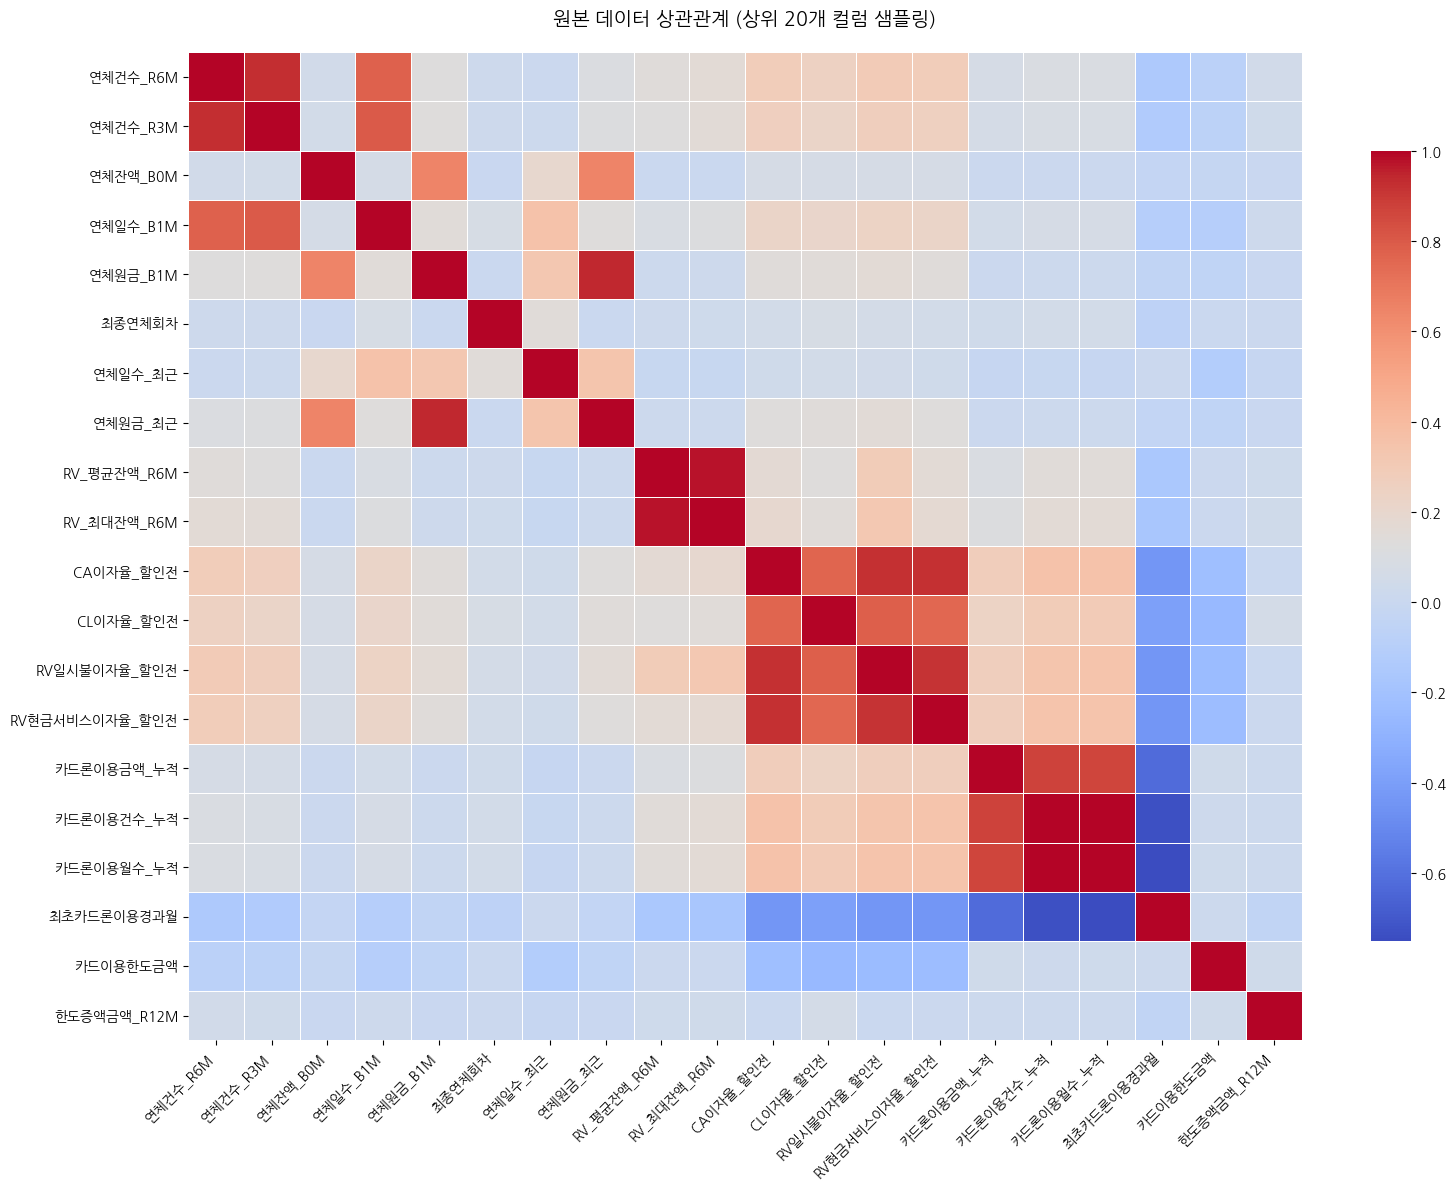


📈 전처리 후 상관관계 히트맵


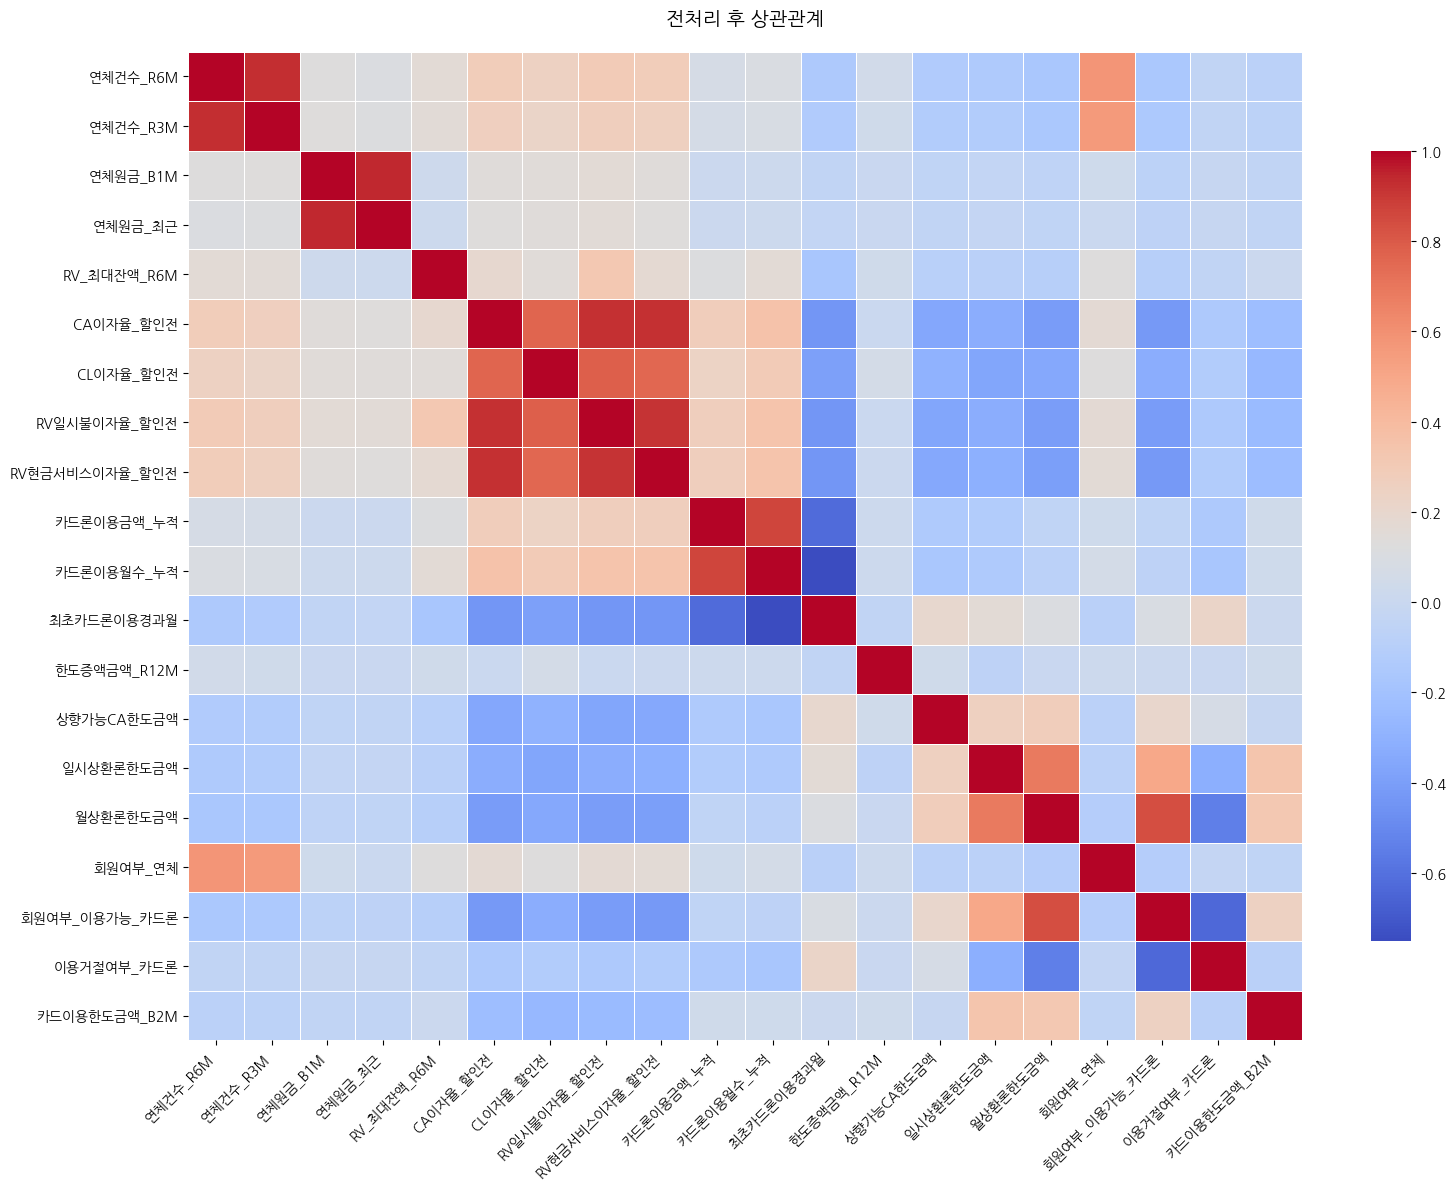


📊 타겟 변수 분포


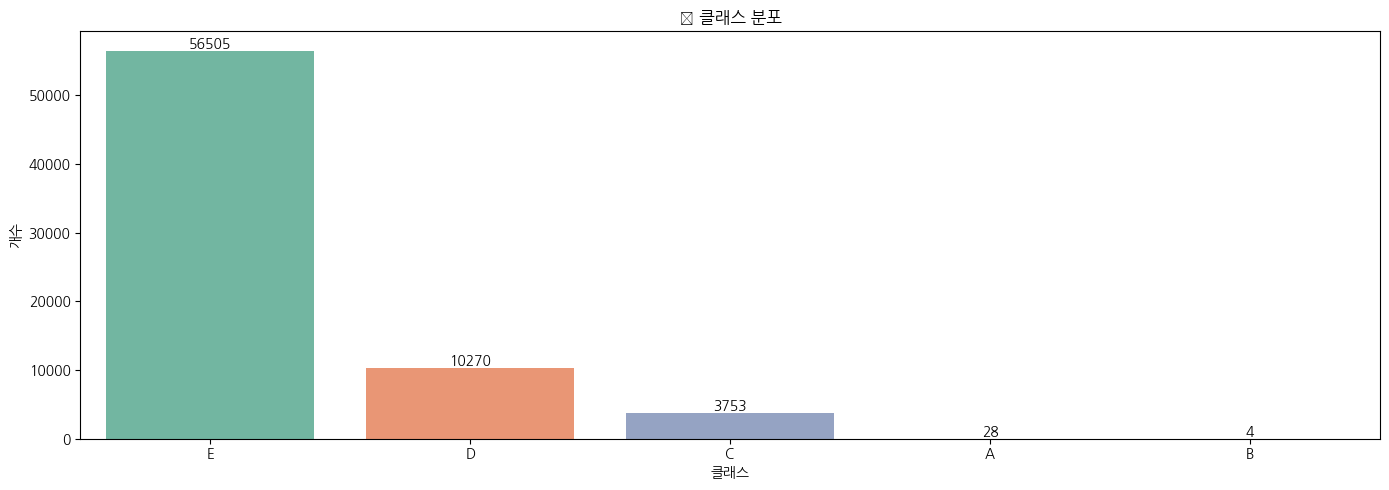


⚖️ SMOTE를 통한 클래스 균형 맞추기
🔄 SMOTE 적용 시작...
📊 SMOTE 전 클래스 분포:
   클래스 A: 28개
   클래스 B: 4개
   클래스 C: 3,753개
   클래스 D: 10,270개
   클래스 E: 56,505개
📊 SMOTE 후 클래스 분포:
   클래스 A: 56,505개
   클래스 B: 56,505개
   클래스 C: 56,505개
   클래스 D: 56,505개
   클래스 E: 56,505개
✅ SMOTE 완료: 70,560 → 282,525개

📊 SMOTE 전후 클래스 분포 비교


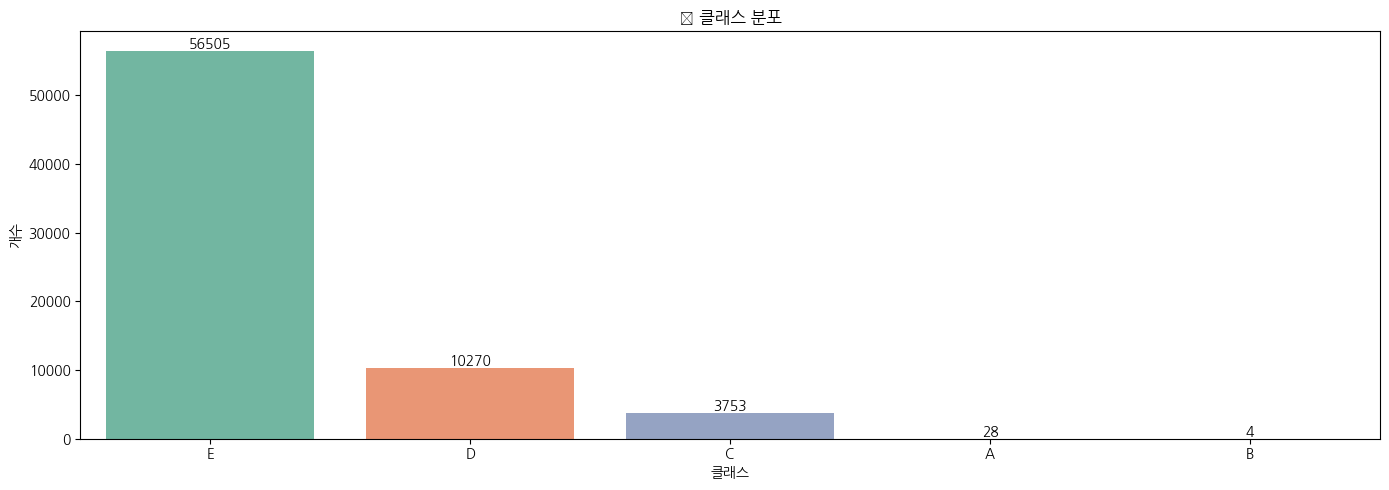

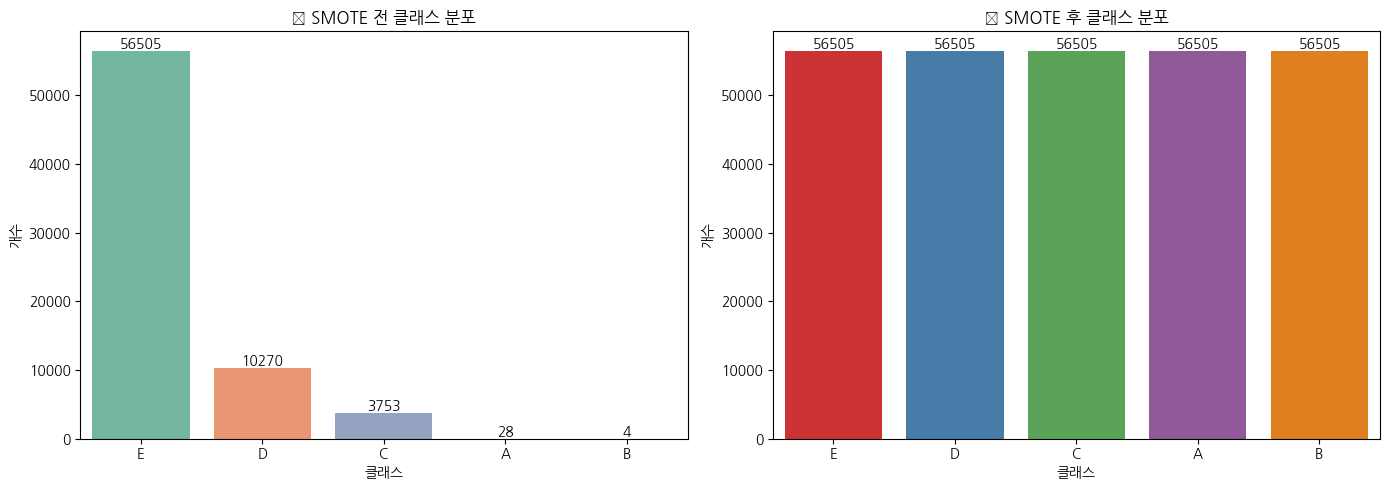


💾 전처리 파이프라인 저장
[19:00:52] 💾 파이프라인 저장 완료: /content/drive/MyDrive/project/preprocessing_pipeline.pkl

📋 전처리 요약 보고서
🕐 처리 시각: 2025-05-25 19:00:45.575490
📊 최종 특성 수: 26
🗑️ 제거된 행 수: 0
🗑️ 제거된 컬럼 수: 15
   - 비수치형: 2개
   - 높은 상관관계: 7개
   - 낮은 분산: 6개

🎯 최종 데이터 준비 완료!
   훈련 데이터: (282525, 26)

💡 사용 예시: 새로운 데이터 전처리

🔄 저장된 파이프라인으로 새로운 데이터 전처리하기:

# 1. 파이프라인 로드
preprocessor = CardDefaultPreprocessor.load_pipeline('/path/to/preprocessing_pipeline.pkl')

# 2. 새로운 데이터 전처리
new_df = pd.read_csv('new_data.csv')
X_new = preprocessor.transform(new_df)

# 3. 예측 수행
predictions = model.predict(X_new)
    
✅ 모든 처리가 완료되었습니다!

🎉 전처리 파이프라인 실행 완료!
✅ 사용 가능한 변수들:
   - X_train: (282525, 26) (SMOTE 적용됨)
   - y_train: (282525,) (SMOTE 적용됨)
   - preprocessor: 전처리 파이프라인 객체
   - summary: 전처리 요약 정보

📌 다음 단계: 머신러닝 모델 학습
   - result['X_train'], result['y_train']으로 모델 학습
   - result['X_test'], result['y_test']로 모델 평가
   - result['preprocessor']로 새로운 데이터 전처리
📚 신용카드 데이터 전처리 파이프라인 라이브러리 로드 완료!
💡 main() 함수를 실행하여 전처리를 시작하세요.


In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from IPython.display import display
from sklearn.feature_selection import VarianceThreshold
import matplotlib.font_manager as fm
import matplotlib as mpl
import pickle
import warnings
from datetime import datetime
import logging

# 경고 메시지 제거 (코랩 환경에서 깔끔한 출력을 위해)
warnings.filterwarnings('ignore')

# ================================================================================================
# 🔧 설정 클래스 - 하드코딩 문제 해결
# ================================================================================================
class PreprocessingConfig:
    """전처리 설정을 한 곳에서 관리"""

    # 🔹 파일 경로 설정
    DATA_PATH = "/content/drive/MyDrive/project/card_train.csv"
    MODEL_SAVE_PATH = "/content/drive/MyDrive/project/preprocessing_pipeline.pkl"

    # 🔹 전처리 임계값들
    Z_SCORE_THRESHOLD = 3              # Z-score 이상치 기준
    CORRELATION_THRESHOLD = 0.95       # 상관관계 제거 기준
    VARIANCE_THRESHOLD = 0.01          # 분산 제거 기준
    MIN_SAMPLES_AFTER_OUTLIER = 100    # 이상치 제거 후 최소 샘플 수

    # 🔹 SMOTE 설정
    SMOTE_RANDOM_STATE = 42
    SMOTE_K_NEIGHBORS = 1

    # 🔹 시각화 설정
    FIGURE_SIZE_LARGE = (18, 14)
    FIGURE_SIZE_MEDIUM = (16, 12)
    FIGURE_SIZE_SMALL = (14, 5)

    # 🔹 타겟 컬럼
    TARGET_COLUMN = 'Segment'

    # 🔹 선택할 컬럼
    SELECTED_COLUMNS = [
        '연체건수_R6M', '연체건수_R3M', '연체잔액_B0M', '연체일수_B1M', '연체원금_B1M',
        '최종연체회차', '연체일수_최근', '연체원금_최근', 'RV_평균잔액_R6M', 'RV_최대잔액_R6M',
        'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전',
        '카드론이용금액_누적', '카드론이용건수_누적', '카드론이용월수_누적', '최초카드론이용경과월',
        '카드이용한도금액', '한도증액금액_R12M', '한도증액횟수_R12M', '상향가능한도금액',
        '상향가능CA한도금액', '일시상환론한도금액', '월상환론한도금액', '한도심사요청건수',
        '한도요청거절건수', '카드론동의여부', '회원여부_연체', '회원여부_이용가능_카드론',
        '이용거절여부_카드론', 'Segment', '카드이용한도금액_B1M', '카드이용한도금액_B2M',
        '연체감액여부_R3M', '시장단기연체여부_R6M', 'rv최초시작후경과일', 'RV약정청구율',
        'RV최소결제비율'
    ]

# ================================================================================================
# 🎨 한글 폰트 설정 함수 - 에러 핸들링 추가
# ================================================================================================
def setup_korean_font():
    """한글 폰트 설정 (에러 핸들링 포함)"""
    try:
        # NanumGothic 폰트 등록 시도
        font_dirs = ['/usr/share/fonts/truetype/nanum']
        font_files = fm.findSystemFonts(fontpaths=font_dirs)

        if font_files:
            for f in font_files:
                fm.fontManager.addfont(f)
            plt.rcParams['font.family'] = 'NanumGothic'
            print("✅ 한글 폰트 설정 완료")
        else:
            print("⚠️ NanumGothic 폰트를 찾을 수 없습니다. 기본 폰트를 사용합니다.")

    except Exception as e:
        print(f"⚠️ 폰트 설정 중 오류: {e}")
        print("기본 폰트를 사용합니다.")

    # 마이너스 기호 깨짐 방지
    mpl.rcParams['axes.unicode_minus'] = False

# ================================================================================================
# 📊 전처리 파이프라인 클래스
# ================================================================================================
class CardDefaultPreprocessor:
    """
    신용카드 연체 예측을 위한 전처리 파이프라인

    🔥 해결하는 문제들:
    1. 전처리 정보 보존으로 새로운 데이터 예측 가능
    2. 모든 전처리 과정 추적 및 로깅
    3. 재현 가능한 파이프라인 구축
    """

    def __init__(self, config=None):
        self.config = config or PreprocessingConfig()

        # 📋 전처리 정보 저장용
        self.median_values = {}           # 결측치 처리용 median 값들
        self.binary_map = {'Y': 1, 'N': 0, '있음': 1, '없음': 0}
        self.outlier_values = {}          # 이상치 표기값들

        # 🗑️ 제거된 컬럼 추적
        self.initial_missing_cols = []    # 초기에 없었던 컬럼들
        self.non_numeric_dropped_cols = [] # 문자형으로 제거된 컬럼들
        self.high_corr_dropped_cols = []  # 높은 상관관계로 제거된 컬럼들
        self.low_var_dropped_cols = []    # 낮은 분산으로 제거된 컬럼들
        self.outlier_removed_count = 0    # 이상치로 제거된 행 수

        # 📊 최종 정보
        self.selected_features = []       # 최종 선택된 특성들
        self.processing_log = []          # 전처리 과정 로그

        # 🔧 sklearn 객체들
        self.variance_selector = None     # 분산 기반 특성 선택기
        self.scaler = StandardScaler()    # 스케일러 (나중에 사용) 필요시

        # 📅 처리 시각
        self.fit_timestamp = None

    def _log(self, message):
        """로그 메시지 추가"""
        timestamp = datetime.now().strftime("%H:%M:%S")
        log_message = f"[{timestamp}] {message}"
        self.processing_log.append(log_message)
        print(log_message)

    def fit_transform(self, df):
        """
        학습 데이터에 대한 전처리 수행
        ✅ 해결: 모든 전처리 정보를 객체에 저장하여 재현 가능하게 함
        """
        self.fit_timestamp = datetime.now()
        self._log("🚀 전처리 시작")

        df = df.copy()
        original_shape = df.shape
        self._log(f"📊 원본 데이터 크기: {original_shape}")

        # ============================================================================
        # 1. 컬럼 선택 및 누락 컬럼 체크
        # ============================================================================
        # ✅ 해결: 설정 클래스 사용, 누락 컬럼 추적

        available_cols = [col for col in self.config.SELECTED_COLUMNS if col in df.columns]
        self.initial_missing_cols = [col for col in self.config.SELECTED_COLUMNS if col not in df.columns]

        if self.initial_missing_cols:
            self._log(f"❌ 초기 누락된 컬럼 ({len(self.initial_missing_cols)}개): {self.initial_missing_cols}")

        df = df[available_cols].copy()
        self._log(f"✅ 컬럼 선택 완료: {len(available_cols)}개 컬럼 사용")

        # ============================================================================
        # 2. 이진 문자값 변환
        # ============================================================================
        df = df.replace(self.binary_map)
        self._log("✅ 이진 문자값 변환 완료")

        # ============================================================================
        # 3. 문자형 컬럼 제거 (타겟 제외)
        # ============================================================================
        # ✅ 해결: 제거된 컬럼 목록 저장

        non_numeric_cols = df.select_dtypes(exclude=["int", "float"]).columns.tolist()
        if self.config.TARGET_COLUMN in non_numeric_cols:
            non_numeric_cols.remove(self.config.TARGET_COLUMN)

        self.non_numeric_dropped_cols = non_numeric_cols.copy()
        df = df.drop(columns=non_numeric_cols)

        if self.non_numeric_dropped_cols:
            self._log(f"🔤 문자형 컬럼 제거 ({len(self.non_numeric_dropped_cols)}개): {self.non_numeric_dropped_cols}")

        # ============================================================================
        # 4. 이상치 표기값 처리
        # ============================================================================
        # ✅ 해결: 설정으로 관리, 처리 정보 저장

        outlier_values = [-999999, 99999999, -99]
        self.outlier_values = outlier_values

        before_outlier_nulls = df.isnull().sum().sum()
        df.replace(outlier_values, np.nan, inplace=True)
        after_outlier_nulls = df.isnull().sum().sum()

        self._log(f"🔧 이상치 표기값 처리: {after_outlier_nulls - before_outlier_nulls}개 값을 결측치로 변환")

        # ============================================================================
        # 5. 결측치 처리
        # ============================================================================
        # ✅ 해결: 모든 컬럼의 median 값 저장

        numeric_cols = df.select_dtypes(include=["int", "float"]).columns
        numeric_cols = numeric_cols.drop(self.config.TARGET_COLUMN, errors='ignore')

        null_counts_before = df[numeric_cols].isnull().sum()
        total_nulls_before = null_counts_before.sum()

        for col in numeric_cols:
            if df[col].isnull().sum() > 0:
                self.median_values[col] = df[col].median()
                df[col] = df[col].fillna(self.median_values[col])

        self._log(f"🔧 결측치 처리 완료: {total_nulls_before}개 결측치를 median으로 대체")

        # ============================================================================
        # 6. 파생 변수 생성
        # ============================================================================
        # ✅ 해결: 필요한 컬럼 존재 여부 확인 후 생성

        derived_features_created = []

        # 연체율
        if all(col in df.columns for col in ['연체잔액_B0M', 'RV_최대잔액_R6M']):
            df['연체율'] = df['연체잔액_B0M'] / (df['RV_최대잔액_R6M'] + 1)
            derived_features_created.append('연체율')

        # 한도사용률
        if all(col in df.columns for col in ['RV_최대잔액_R6M', '카드이용한도금액']):
            df['한도사용률'] = df['RV_최대잔액_R6M'] / (df['카드이용한도금액'] + 1)
            derived_features_created.append('한도사용률')

        # 카드론사용률
        if all(col in df.columns for col in ['카드론이용금액_누적', '카드이용한도금액']):
            df['카드론사용률'] = df['카드론이용금액_누적'] / (df['카드이용한도금액'] + 1)
            derived_features_created.append('카드론사용률')

        if derived_features_created:
            self._log(f"🎯 파생 변수 생성 ({len(derived_features_created)}개): {derived_features_created}")

        # ============================================================================
        # 7. Z-score 기반 이상치 제거
        # ============================================================================
        # ✅ 해결: 제거된 행 수 추적, 설정값 사용

        df_numeric = df.select_dtypes(include='number').drop(columns=[self.config.TARGET_COLUMN], errors='ignore')

        if len(df_numeric.columns) > 0:
            z_scores = np.abs(zscore(df_numeric, nan_policy='omit'))
            mask = (z_scores < self.config.Z_SCORE_THRESHOLD).all(axis=1)

            if mask.sum() >= self.config.MIN_SAMPLES_AFTER_OUTLIER:
                outliers_removed = len(df) - mask.sum()
                df = df.loc[mask].reset_index(drop=True)
                self.outlier_removed_count = outliers_removed
                self._log(f"🔍 Z-score 이상치 제거: {outliers_removed}개 행 제거, 남은 데이터: {len(df)}개")
            else:
                self._log(f"⚠️ Z-score 이상치 제거 건너뜀: 제거 후 데이터가 {self.config.MIN_SAMPLES_AFTER_OUTLIER}개 미만")

        # ============================================================================
        # 8. 타겟 분리
        # ============================================================================
        if self.config.TARGET_COLUMN not in df.columns:
            raise ValueError(f"❌ 타겟 컬럼 '{self.config.TARGET_COLUMN}'이 데이터에 없습니다.")

        X = df.drop(columns=[self.config.TARGET_COLUMN])
        y = df[self.config.TARGET_COLUMN].reset_index(drop=True)

        self._log(f"🎯 타겟 분리 완료: X={X.shape}, y={y.shape}")

        # ============================================================================
        # 9. 높은 상관관계 변수 제거
        # ============================================================================
        # ✅ 해결: 제거된 변수 목록 저장

        if len(X.columns) > 1:
            corr_matrix = X.corr().abs()
            upper_triangle = corr_matrix.where(
                np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
            )

            high_corr_pairs = []
            for column in upper_triangle.columns:
                high_corr_features = upper_triangle.index[
                    upper_triangle[column] > self.config.CORRELATION_THRESHOLD
                ].tolist()
                if high_corr_features:
                    high_corr_pairs.extend(high_corr_features)

            self.high_corr_dropped_cols = list(set(high_corr_pairs))

            if self.high_corr_dropped_cols:
                X = X.drop(columns=self.high_corr_dropped_cols)
                self._log(f"🔗 높은 상관관계 변수 제거 ({len(self.high_corr_dropped_cols)}개): {self.high_corr_dropped_cols}")

        # ============================================================================
        # 10. 낮은 분산 변수 제거
        # ============================================================================
        # ✅ 해결: VarianceThreshold 객체 저장

        if len(X.columns) > 0:
            self.variance_selector = VarianceThreshold(threshold=self.config.VARIANCE_THRESHOLD)

            columns_before_var = X.columns.tolist()
            X_var_filtered = self.variance_selector.fit_transform(X)
            selected_var_columns = X.columns[self.variance_selector.get_support()].tolist()

            self.low_var_dropped_cols = [col for col in columns_before_var if col not in selected_var_columns]

            X = pd.DataFrame(X_var_filtered, columns=selected_var_columns)

            if self.low_var_dropped_cols:
                self._log(f"📊 낮은 분산 변수 제거 ({len(self.low_var_dropped_cols)}개): {self.low_var_dropped_cols}")

        # ============================================================================
        # 11. 최종 정보 저장
        # ============================================================================
        self.selected_features = X.columns.tolist()
        self._log(f"✅ 전처리 완료! 최종 특성 수: {len(self.selected_features)}")

        return X, y

    def transform(self, df):
        """
        새로운 데이터에 대한 전처리 (예측용)

        🔥 핵심: 학습 시 저장된 모든 정보를 활용하여 동일한 전처리 적용
        """
        if self.fit_timestamp is None:
            raise ValueError("❌ 먼저 fit_transform()을 호출해야 합니다.")

        self._log("🔄 새로운 데이터 전처리 시작")
        df = df.copy()

        # 1. 컬럼 선택
        available_cols = [col for col in self.config.SELECTED_COLUMNS if col in df.columns]
        df = df[available_cols].copy()

        # 2. 이진 문자값 변환
        df = df.replace(self.binary_map)

        # 3. 문자형 컬럼 제거
        df = df.drop(columns=self.non_numeric_dropped_cols, errors='ignore')

        # 4. 이상치 표기값 처리
        df.replace(self.outlier_values, np.nan, inplace=True)

        # 5. 결측치 처리 (저장된 median 값 사용)
        for col, median_val in self.median_values.items():
            if col in df.columns:
                df[col] = df[col].fillna(median_val)

        # 6. 파생 변수 생성 (동일한 로직)
        if all(col in df.columns for col in ['연체잔액_B0M', 'RV_최대잔액_R6M']):
            df['연체율'] = df['연체잔액_B0M'] / (df['RV_최대잔액_R6M'] + 1)

        if all(col in df.columns for col in ['RV_최대잔액_R6M', '카드이용한도금액']):
            df['한도사용률'] = df['RV_최대잔액_R6M'] / (df['카드이용한도금액'] + 1)

        if all(col in df.columns for col in ['카드론이용금액_누적', '카드이용한도금액']):
            df['카드론사용률'] = df['카드론이용금액_누적'] / (df['카드이용한도금액'] + 1)

        # 7. 타겟 제거 (있다면)
        if self.config.TARGET_COLUMN in df.columns:
            df = df.drop(columns=[self.config.TARGET_COLUMN])

        # 8. 상관관계 높은 변수 제거 (저장된 목록 사용)
        df = df.drop(columns=self.high_corr_dropped_cols, errors='ignore')

        # 9. 분산 낮은 변수 제거 (저장된 객체 사용)
        if self.variance_selector is not None:
            # 학습 시와 동일한 컬럼 순서로 맞춤
            available_features = [col for col in self.variance_selector.feature_names_in_ if col in df.columns]
            if available_features:
                df_for_var = df[available_features]
                df_var_filtered = self.variance_selector.transform(df_for_var)
                selected_cols = self.variance_selector.feature_names_in_[self.variance_selector.get_support()]
                df = pd.DataFrame(df_var_filtered, columns=selected_cols)

        # 10. 최종 특성 순서 맞춤
        missing_features = set(self.selected_features) - set(df.columns)
        if missing_features:
            self._log(f"⚠️ 누락된 특성들을 0으로 채움: {missing_features}")
            for feature in missing_features:
                df[feature] = 0

        # 특성 순서 정렬
        df = df[self.selected_features]

        self._log(f"✅ 새로운 데이터 전처리 완료: {df.shape}")
        return df

    def save_pipeline(self, filepath=None):
        """전처리 파이프라인 저장"""
        if filepath is None:
            filepath = self.config.MODEL_SAVE_PATH

        try:
            with open(filepath, 'wb') as f:
                pickle.dump(self, f)
            self._log(f"💾 파이프라인 저장 완료: {filepath}")
        except Exception as e:
            self._log(f"❌ 파이프라인 저장 실패: {e}")

    @classmethod
    def load_pipeline(cls, filepath):
        """저장된 전처리 파이프라인 로드"""
        try:
            with open(filepath, 'rb') as f:
                pipeline = pickle.load(f)
            print(f"✅ 파이프라인 로드 완료: {filepath}")
            return pipeline
        except Exception as e:
            print(f"❌ 파이프라인 로드 실패: {e}")
            return None

    def get_preprocessing_summary(self):
        """전처리 과정 요약 정보 반환"""
        summary = {
            'fit_timestamp': self.fit_timestamp,
            'initial_missing_cols': self.initial_missing_cols,
            'non_numeric_dropped_cols': self.non_numeric_dropped_cols,
            'high_corr_dropped_cols': self.high_corr_dropped_cols,
            'low_var_dropped_cols': self.low_var_dropped_cols,
            'outlier_removed_count': self.outlier_removed_count,
            'final_feature_count': len(self.selected_features),
            'selected_features': self.selected_features,
            'processing_log': self.processing_log
        }
        return summary

# ================================================================================================
# 📊 시각화 함수들 - 에러 핸들링 추가
# ================================================================================================


# ================================================================================================
# 📊 시각화 함수들 - 에러 핸들링 포함
# ================================================================================================

def plot_correlation_heatmap(df, title, figsize=None):
    """상관관계 히트맵 그리기 (에러 핸들링 포함)"""
    try:
        if figsize is None:
            figsize = PreprocessingConfig.FIGURE_SIZE_MEDIUM

        numeric_df = df.select_dtypes(include=['int', 'float'])

        if len(numeric_df.columns) < 2:
            print(f"⚠️ 상관관계 분석을 위한 수치형 컬럼이 부족합니다. (현재: {len(numeric_df.columns)}개)")
            return

        plt.figure(figsize=figsize)
        correlation_matrix = numeric_df.corr()

        sns.heatmap(
            correlation_matrix,
            cmap="coolwarm",
            annot=False,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'shrink': 0.8}
        )
        plt.title(title, fontsize=14, pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ 히트맵 그리기 실패: {e}")



def plot_class_distribution(y_before, y_after=None, figsize=None):
    """클래스 분포 시각화 (SMOTE 전후 비교)"""
    try:
        if figsize is None:
            figsize = PreprocessingConfig.FIGURE_SIZE_SMALL

        if y_after is not None:
            fig, axes = plt.subplots(1, 2, figsize=figsize)

            # SMOTE 전
            sns.countplot(x=y_before, ax=axes[0], palette="Set2")
            axes[0].set_title("🔍 SMOTE 전 클래스 분포")
            axes[0].set_xlabel("클래스")
            axes[0].set_ylabel("개수")

            for p in axes[0].patches:
                axes[0].annotate(f'{int(p.get_height())}',
                                 (p.get_x() + p.get_width()/2., p.get_height()),
                                 ha='center', va='bottom')

            # SMOTE 후
            sns.countplot(x=y_after, ax=axes[1], palette="Set1")
            axes[1].set_title("✅ SMOTE 후 클래스 분포")
            axes[1].set_xlabel("클래스")
            axes[1].set_ylabel("개수")

            for p in axes[1].patches:
                axes[1].annotate(f'{int(p.get_height())}',
                                 (p.get_x() + p.get_width()/2., p.get_height()),
                                 ha='center', va='bottom')

            plt.tight_layout()
            plt.show()
        else:
            plt.figure(figsize=figsize)
            sns.countplot(x=y_before, palette="Set2")
            plt.title("📊 클래스 분포")
            plt.xlabel("클래스")
            plt.ylabel("개수")

            ax = plt.gca()
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width()/2., p.get_height()),
                            ha='center', va='bottom')

            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"❌ 클래스 분포 시각화 실패: {e}")


def plot_missing_values(df, title="결측치 분포", figsize=None):
    """결측치 분포 시각화"""
    try:
        if figsize is None:
            figsize = PreprocessingConfig.FIGURE_SIZE_MEDIUM

        # 결측치 개수 계산
        missing_data = df.isnull().sum()
        missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

        if len(missing_data) == 0:
            print("✅ 결측치가 없습니다!")
            return

        # 시각화
        plt.figure(figsize=figsize)
        missing_data.plot(kind='bar', color='coral')
        plt.title(title)
        plt.xlabel("컬럼")
        plt.ylabel("결측치 개수")
        plt.xticks(rotation=45, ha='right')

        # 바 차트 위에 개수 표시
        ax = plt.gca()
        for i, v in enumerate(missing_data.values):
            ax.text(i, v + max(missing_data.values)*0.01, str(v),
                    ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ 결측치 시각화 실패: {e}")



# ================================================================================================
# 🎯 SMOTE 적용 함수 - 데이터 누수 방지
# ================================================================================================
def apply_smote_properly(X_train, y_train, config=None):
    """
    SMOTE를 올바르게 적용

    🔥 핵심: 훈련 데이터에만 적용해야 함
    """
    if config is None:
        config = PreprocessingConfig()

    print("🔄 SMOTE 적용 시작...")

    try:
        # 클래스 분포 확인
        class_counts = pd.Series(y_train).value_counts().sort_index()
        print(f"📊 SMOTE 전 클래스 분포:")
        for class_val, count in class_counts.items():
            print(f"   클래스 {class_val}: {count:,}개")

        # 최소 클래스의 샘플 수 확인
        min_samples = class_counts.min()
        if min_samples < config.SMOTE_K_NEIGHBORS + 1:
            k_neighbors = max(1, min_samples - 1)
            print(f"⚠️ K-neighbors를 {k_neighbors}로 조정 (최소 클래스 샘플 수: {min_samples})")
        else:
            k_neighbors = config.SMOTE_K_NEIGHBORS

        # SMOTE 적용
        smote = SMOTE(
            random_state=config.SMOTE_RANDOM_STATE,
            k_neighbors=k_neighbors
        )

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # 결과 확인
        class_counts_after = pd.Series(y_train_smote).value_counts().sort_index()
        print(f"📊 SMOTE 후 클래스 분포:")
        for class_val, count in class_counts_after.items():
            print(f"   클래스 {class_val}: {count:,}개")

        print(f"✅ SMOTE 완료: {X_train.shape[0]:,} → {X_train_smote.shape[0]:,}개")

        return X_train_smote, y_train_smote

    except Exception as e:
        print(f"❌ SMOTE 적용 실패: {e}")
        print("원본 데이터를 그대로 반환합니다.")
        return X_train, y_train

# ================================================================================================
# 🏃‍♂️ 메인 실행 함수
# ================================================================================================
def main():
    """메인 실행 함수"""

    print("=" * 80)
    print("🚀  신용카드 데이터 전처리 파이프라인 시작")
    print("=" * 80)

    # ============================================================================
    # 1. 초기 설정
    # ============================================================================
    setup_korean_font()
    config = PreprocessingConfig()

    # 구글 드라이브 마운트 (코랩 환경에서)
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        print("✅ 구글 드라이브 마운트 완료")
    except ImportError:
        print("⚠️ 로컬 환경에서 실행 중입니다.")
    except Exception as e:
        print(f"⚠️ 구글 드라이브 마운트 실패: {e}")

    # ============================================================================
    # 2. 데이터 로드
    # ============================================================================
    try:
        print(f"\n📂 데이터 로드 중: {config.DATA_PATH}")
        df = pd.read_csv(config.DATA_PATH)
        print(f"✅ 데이터 로드 완료: {df.shape}")
        print(f"📊 컬럼 수: {len(df.columns)}, 행 수: {len(df):,}")

    except FileNotFoundError:
        print(f"❌ 파일을 찾을 수 없습니다: {config.DATA_PATH}")
        print("경로를 확인해주세요.")
        return
    except Exception as e:
        print(f"❌ 데이터 로드 실패: {e}")
        return

    # ============================================================================
    # 3. 기본 정보 확인
    # ============================================================================
    print("\n" + "="*50)
    print("📋 데이터 기본 정보")
    print("="*50)

    print(f"🔍 데이터 형태: {df.shape}")
    print(f"🔍 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # 타겟 분포 확인
    if config.TARGET_COLUMN in df.columns:
        print(f"\n🎯 타겟 변수 ({config.TARGET_COLUMN}) 분포:")
        target_dist = df[config.TARGET_COLUMN].value_counts().sort_index()
        for val, count in target_dist.items():
            percentage = count / len(df) * 100
            print(f"   {val}: {count:,}개 ({percentage:.1f}%)")

    # 결측치 확인
    missing_info = df.isnull().sum()
    missing_cols = missing_info[missing_info > 0]

    if len(missing_cols) > 0:
        print(f"\n❓ 결측치가 있는 컬럼: {len(missing_cols)}개")
        print("상위 5개 컬럼:")
        for col, count in missing_cols.head().items():
            percentage = count / len(df) * 100
            print(f"   {col}: {count:,}개 ({percentage:.1f}%)")

        # ✅ 여기에 시각화 함수 호출
        plot_missing_values(df, title="전처리 전 결측치 분포")

    else:
        print("\n✅ 결측치 없음")


    # ============================================================================
    # 4. 전처리 파이프라인 실행
    # ============================================================================

    print("\n" + "="*50)
    print("🔧 전처리 파이프라인 실행")
    print("="*50)

    # 전처리 객체 생성
    preprocessor = CardDefaultPreprocessor(config)

    # 전처리 실행
    try:
        X, y = preprocessor.fit_transform(df)
        print(f"\n🎯 전처리 완료!")
        print(f"   최종 특성 수: {X.shape[1]}")
        print(f"   최종 샘플 수: {X.shape[0]:,}")

    except Exception as e:
        print(f"❌ 전처리 실패: {e}")
        return

    # ============================================================================
    # 5. 전처리 결과 시각화
    # ============================================================================
    print("\n" + "="*50)
    print("📊 전처리 결과 시각화")
    print("="*50)

    # 원본 vs 전처리 후 비교 (샘플링)
    try:
        print("📈 원본 데이터 상관관계 히트맵")
        plot_correlation_heatmap(
            df[config.SELECTED_COLUMNS[:20]].select_dtypes(include='number'),
            "원본 데이터 상관관계 (상위 20개 컬럼 샘플링)"
        )

        print("\n📈 전처리 후 상관관계 히트맵")
        plot_correlation_heatmap(
            X.iloc[:, :20] if X.shape[1] > 20 else X,
            "전처리 후 상관관계"
        )

    except Exception as e:
        print(f"⚠️ 시각화 중 오류: {e}")

    # 클래스 분포 확인
    print("\n📊 타겟 변수 분포")
    plot_class_distribution(y)

    X_train, y_train = X, y


    # ============================================================================
    # 7. SMOTE 적용 (훈련 데이터에만)
    # ============================================================================
    print("\n" + "="*50)
    print("⚖️ SMOTE를 통한 클래스 균형 맞추기")
    print("="*50)

    # SMOTE 적용
    X_train_balanced, y_train_balanced = apply_smote_properly(X_train, y_train, config)

    # SMOTE 전후 비교 시각화
    print("\n📊 SMOTE 전후 클래스 분포 비교")

    # 1️⃣ SMOTE 전 분포 시각화 (단일)
    plot_class_distribution(y_train)

    # 2️⃣ SMOTE 전후 비교 시각화
    plot_class_distribution(y_train, y_train_balanced)

    # ============================================================================
    # 8. 전처리 파이프라인 저장
    # ============================================================================
    print("\n" + "="*50)
    print("💾 전처리 파이프라인 저장")
    print("="*50)

    preprocessor.save_pipeline()

    # ============================================================================
    # 9. 전처리 요약 정보 출력
    # ============================================================================
    print("\n" + "="*50)
    print("📋 전처리 요약 보고서")
    print("="*50)

    summary = preprocessor.get_preprocessing_summary()

    print(f"🕐 처리 시각: {summary['fit_timestamp']}")
    print(f"📊 최종 특성 수: {summary['final_feature_count']}")
    print(f"🗑️ 제거된 행 수: {summary['outlier_removed_count']:,}")

    # 제거된 컬럼들 요약
    total_removed_cols = (
        len(summary['initial_missing_cols']) +
        len(summary['non_numeric_dropped_cols']) +
        len(summary['high_corr_dropped_cols']) +
        len(summary['low_var_dropped_cols'])
    )

    print(f"🗑️ 제거된 컬럼 수: {total_removed_cols}")
    if summary['initial_missing_cols']:
        print(f"   - 초기 누락: {len(summary['initial_missing_cols'])}개")
    if summary['non_numeric_dropped_cols']:
        print(f"   - 비수치형: {len(summary['non_numeric_dropped_cols'])}개")
    if summary['high_corr_dropped_cols']:
        print(f"   - 높은 상관관계: {len(summary['high_corr_dropped_cols'])}개")
    if summary['low_var_dropped_cols']:
        print(f"   - 낮은 분산: {len(summary['low_var_dropped_cols'])}개")

    print(f"\n🎯 최종 데이터 준비 완료!")
    print(f"   훈련 데이터: {X_train_balanced.shape}")


    # ============================================================================
    # 10. 사용 예시 (새로운 데이터 예측용)
    # ============================================================================
    print("\n" + "="*50)
    print("💡 사용 예시: 새로운 데이터 전처리")
    print("="*50)

    print("""
🔄 저장된 파이프라인으로 새로운 데이터 전처리하기:

# 1. 파이프라인 로드
preprocessor = CardDefaultPreprocessor.load_pipeline('/path/to/preprocessing_pipeline.pkl')

# 2. 새로운 데이터 전처리
new_df = pd.read_csv('new_data.csv')
X_new = preprocessor.transform(new_df)

# 3. 예측 수행
predictions = model.predict(X_new)
    """)

    print("✅ 모든 처리가 완료되었습니다!")

    # 반환할 데이터들
    return {
        'X_train': X_train_balanced,
        'y_train': y_train_balanced,
        'preprocessor': preprocessor,
        'summary': summary
    }

# ================================================================================================
# 🚀 코랩에서 바로 실행
# ================================================================================================
if __name__ == "__main__":
    # 메인 함수 실행
    result = main()

    if result:
        print("\n" + "="*80)
        print("🎉 전처리 파이프라인 실행 완료!")
        print("="*80)
        print(f"✅ 사용 가능한 변수들:")
        print(f"   - X_train: {result['X_train'].shape} (SMOTE 적용됨)")
        print(f"   - y_train: {result['y_train'].shape} (SMOTE 적용됨)")
        print(f"   - preprocessor: 전처리 파이프라인 객체")
        print(f"   - summary: 전처리 요약 정보")

        print(f"\n📌 다음 단계: 머신러닝 모델 학습")
        print(f"   - result['X_train'], result['y_train']으로 모델 학습")
        print(f"   - result['X_test'], result['y_test']로 모델 평가")
        print(f"   - result['preprocessor']로 새로운 데이터 전처리")

# ================================================================================================
# 📚 추가 유틸리티 함수들
# ================================================================================================

def quick_data_overview(df, title="데이터 개요"):
    """데이터 빠른 개요 확인"""
    print(f"\n📊 {title}")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Dtypes: {df.dtypes.value_counts().to_dict()}")

    # 결측치 정보
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print(f"Missing values: {len(missing)} columns")
        print(f"Top missing: {missing.head(3).to_dict()}")
    else:
        print("Missing values: None")

def compare_distributions(df1, df2, column, title1="Before", title2="After"):
    """두 데이터프레임의 컬럼 분포 비교"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # 첫 번째 분포
    df1[column].hist(bins=30, ax=axes[0], alpha=0.7, color='skyblue')
    axes[0].set_title(f"{title1} - {column}")
    axes[0].set_ylabel("Frequency")

    # 두 번째 분포
    df2[column].hist(bins=30, ax=axes[1], alpha=0.7, color='lightcoral')
    axes[1].set_title(f"{title2} - {column}")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

def validate_preprocessing_pipeline(preprocessor, test_data_path):
    """전처리 파이프라인 검증"""
    print("🔍 전처리 파이프라인 검증 중...")

    try:
        # 테스트 데이터 로드
        test_df = pd.read_csv(test_data_path)
        print(f"✅ 테스트 데이터 로드: {test_df.shape}")

        # 전처리 적용
        X_test_processed = preprocessor.transform(test_df)
        print(f"✅ 전처리 적용 완료: {X_test_processed.shape}")

        # 기본 검증
        assert not X_test_processed.isnull().any().any(), "결측치가 남아있습니다"
        assert X_test_processed.shape[1] == len(preprocessor.selected_features), "특성 수가 맞지 않습니다"

        print("✅ 파이프라인 검증 통과!")
        return True

    except Exception as e:
        print(f"❌ 파이프라인 검증 실패: {e}")
        return False

print("📚 신용카드 데이터 전처리 파이프라인 라이브러리 로드 완료!")
print("💡 main() 함수를 실행하여 전처리를 시작하세요.")

# 저장된 전처리 파이프라인 로드
#preprocessor = CardDefaultPreprocessor.load_pipeline("/content/drive/MyDrive/project/preprocessing_pipeline.pkl")

# test 데이터 불러오기
#card_test = pd.read_csv("/content/drive/MyDrive/project/card_test.csv")

# 전처리 적용
#X_test = preprocessor.transform(card_test)

# 예측 모델에서 사용
#predictions = model.predict(X_test)